In [1]:
import ROOT
from ROOT import gSystem
gSystem.CompileMacro("MiniTree.cpp")

%load_ext autoreload
%autoreload 2
from canvas_wrapper import canvas
import utils
import plotter

Welcome to JupyROOT 6.08/02


In [2]:
hists_TTTT = ROOT.build_histograms("TTTT", "TTTT_ext_treeProducerSusyMultilepton_tree.root")
hists_TTZ = ROOT.build_histograms("TTZ", "TTZToLLNuNu_treeProducerSusyMultilepton_tree.root")
hists_TTW = ROOT.build_histograms("TTW", "TTWToLNu_treeProducerSusyMultilepton_tree.root")

Finished filling histograms for file TTTT_ext_treeProducerSusyMultilepton_tree.root
Finished filling histograms for file TTZToLLNuNu_treeProducerSusyMultilepton_tree.root
Finished filling histograms for file TTWToLNu_treeProducerSusyMultilepton_tree.root


In [3]:
can = canvas(size=(1600, 1200))

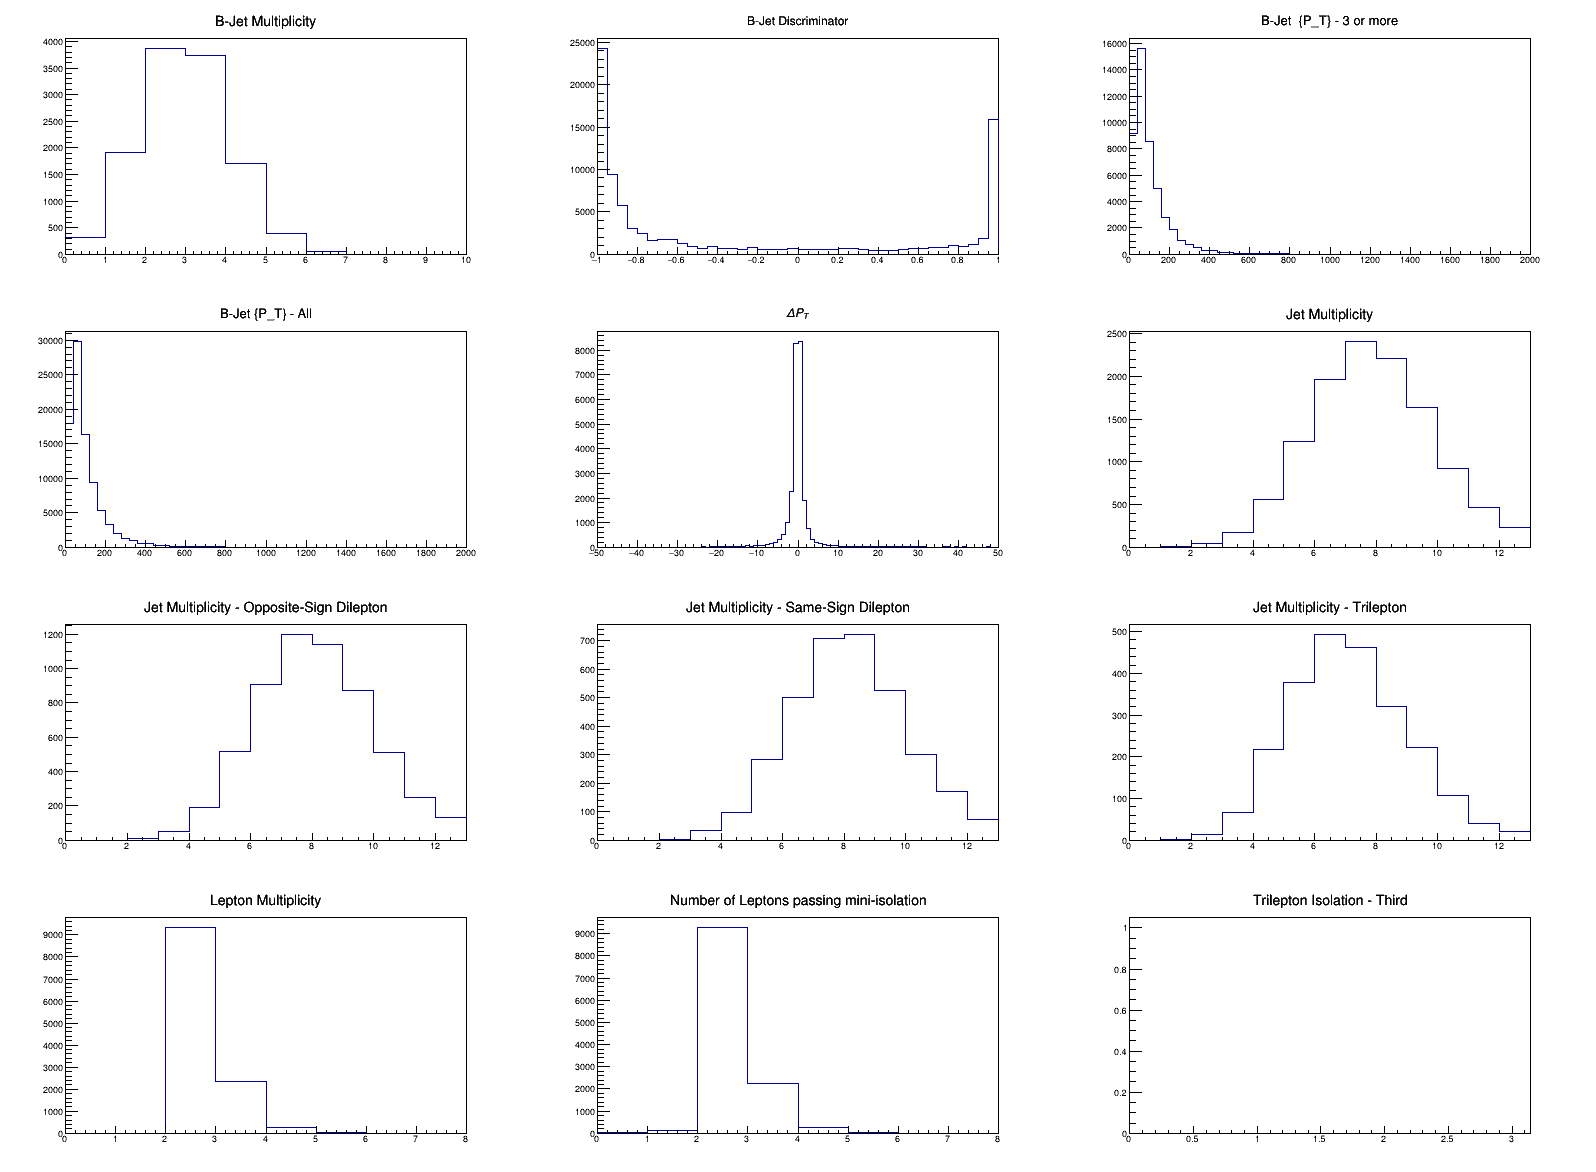

Info in <TCanvas::Print>: png file /tmp/tmpr9x67lv0.png has been created


In [4]:
shape = ROOT.pair("int", "int")
hists_TTTT.draw(can, shape(3,4))
can

In [5]:
can.Clear()
ROOT.gStyle.SetOptStat(1111111)
hists_TTTT.b_jet_discriminator.SetStats(1)
hists_TTTT.b_jet_discriminator.Draw()
hists_TTTT.b_jet_discriminator.GetBinContent(21)

562.0

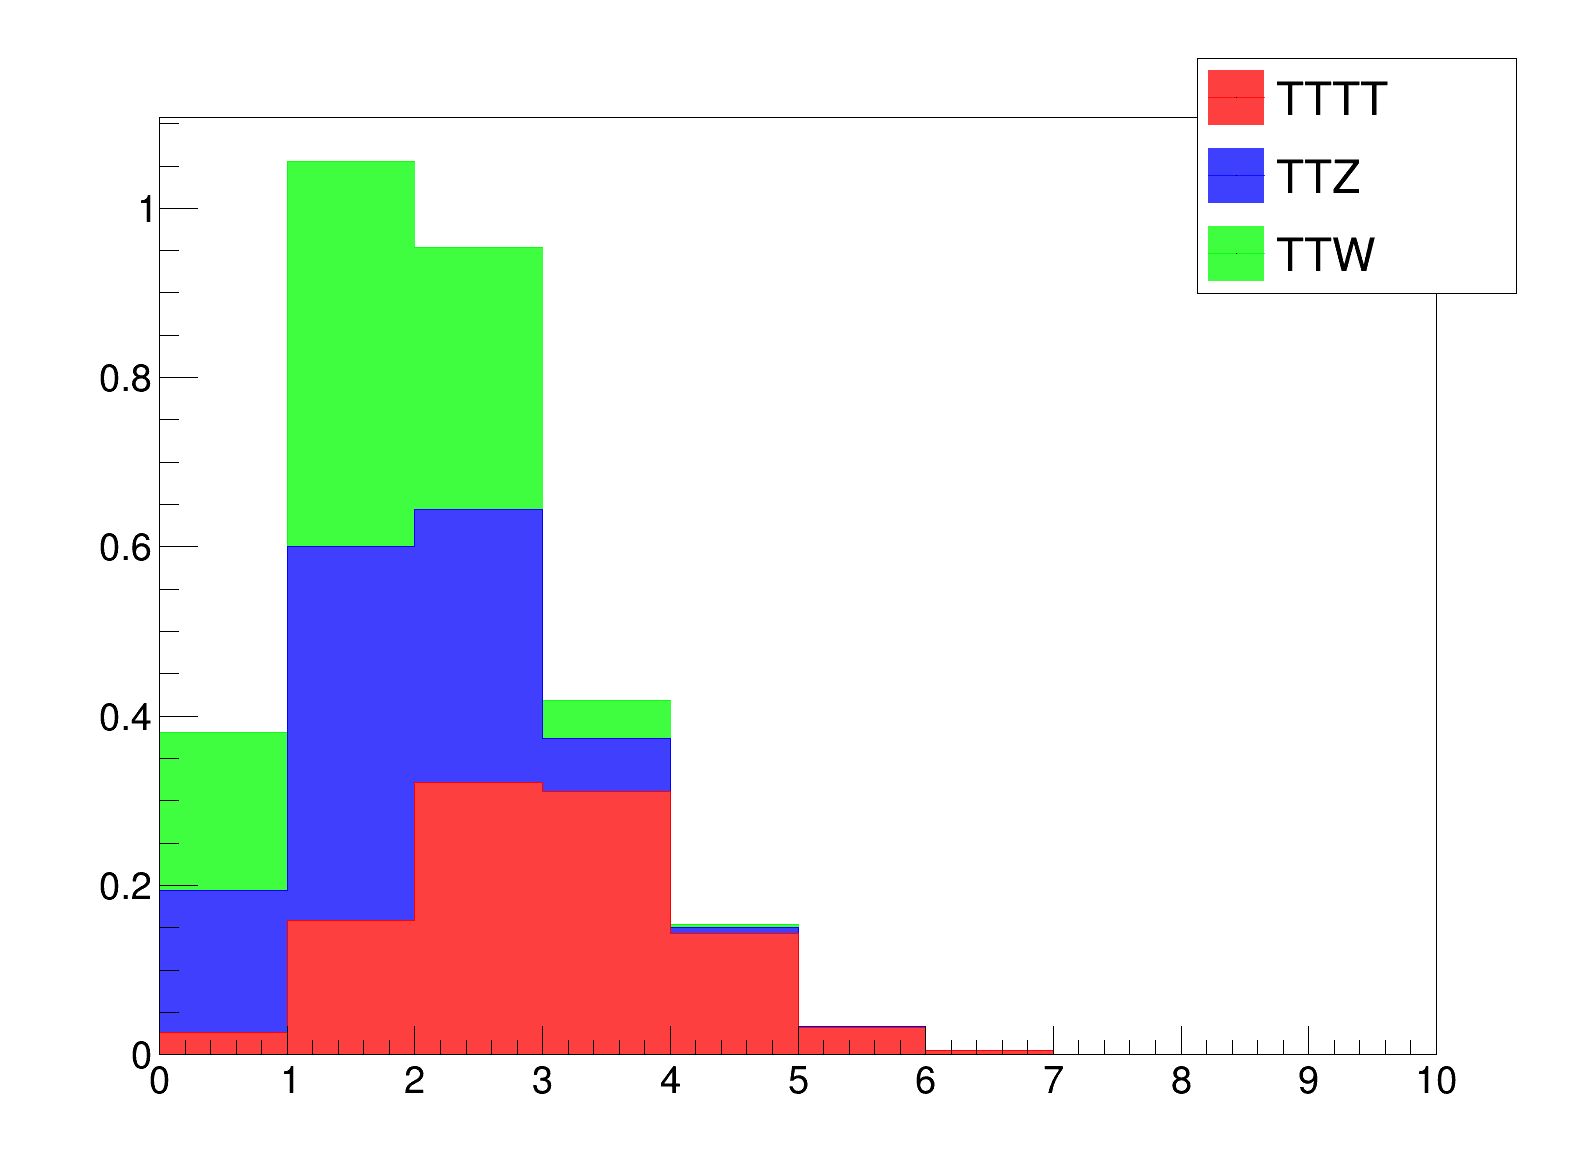

Info in <TCanvas::Print>: png file /tmp/tmpb7ta35sd.png has been created


In [6]:
hists, labels = zip(*[(h.b_jet_count, h.get_sample_name()) for h in [hists_TTTT, hists_TTZ, hists_TTW]])
stack = utils.stack_hist(hists, labels, enable_fill=True, normalize_to=1)
can.Clear()
stack.Draw()
can.BuildLegend(0.75, 0.75, 0.95, 0.95, "")
can

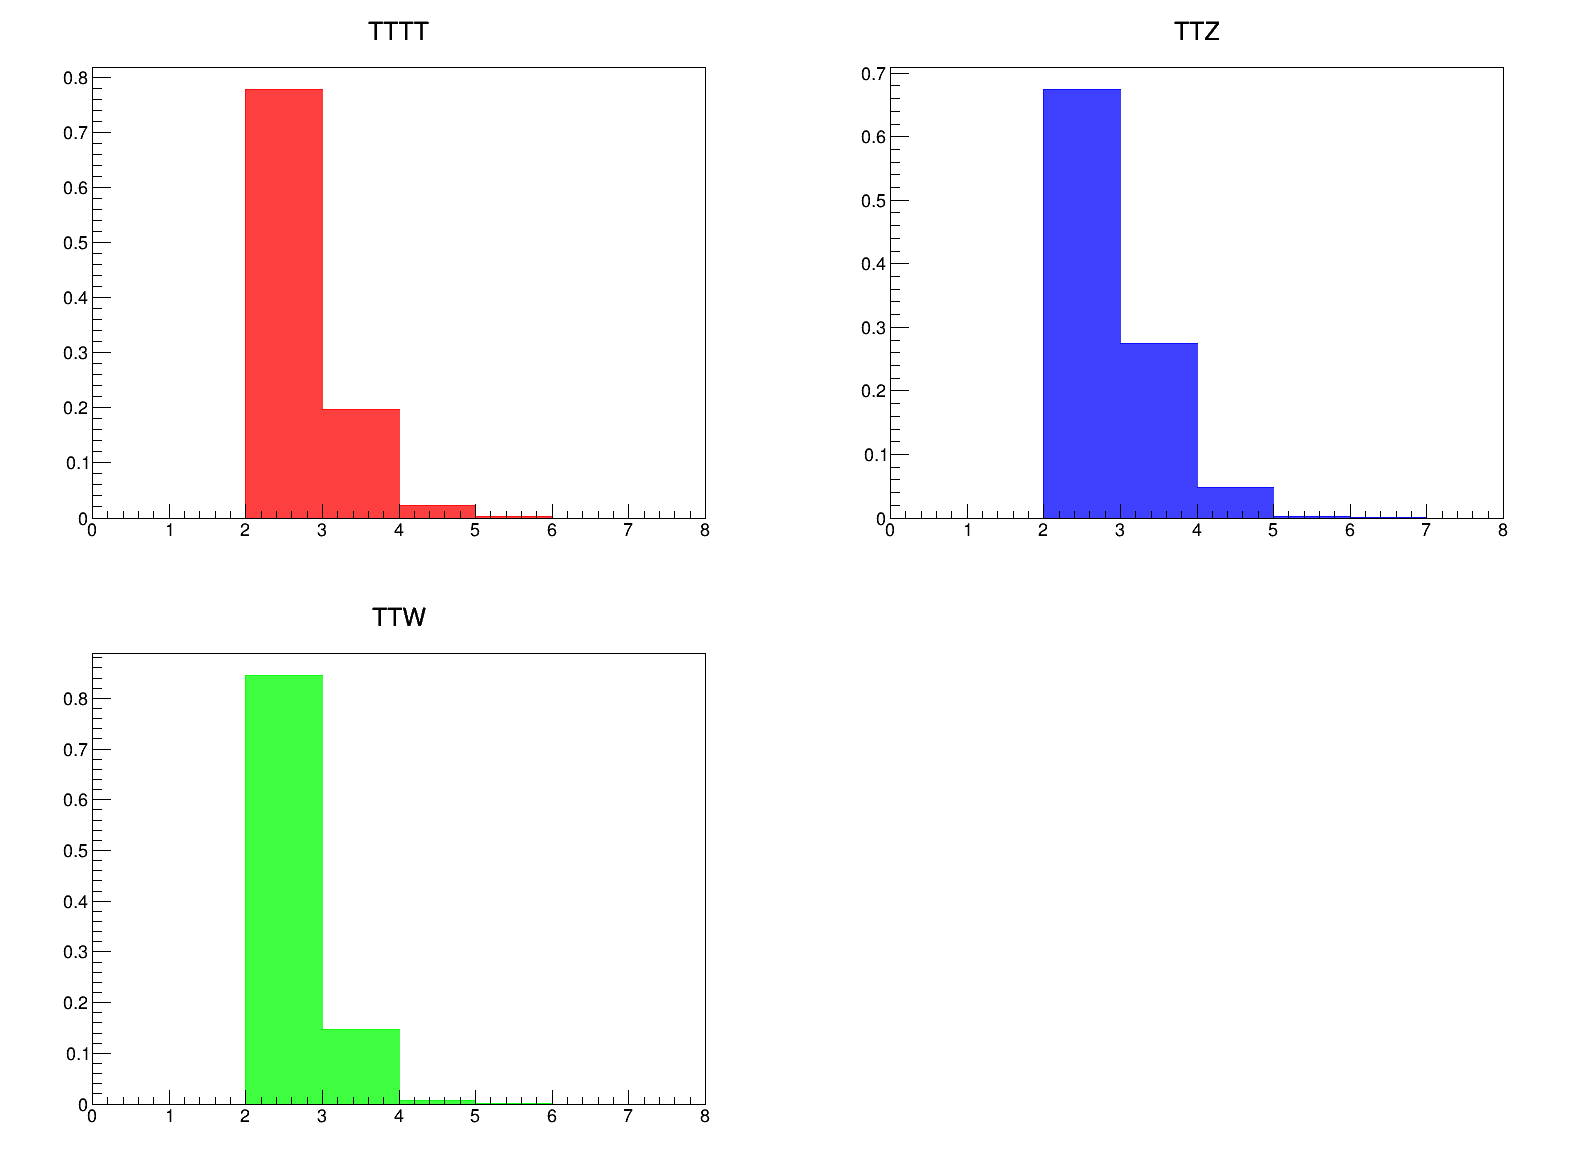

Info in <TCanvas::Print>: png file /tmp/tmpybw8z35g.png has been created


In [7]:
hists, labels = zip(*[(h.lepton_count, h.get_sample_name()) for h in [hists_TTTT, hists_TTZ, hists_TTW]])
stack = utils.stack_hist(hists, labels, enable_fill=True, normalize_to=1)
can.Clear()
stack.Draw("pads")
can.BuildLegend(0.75, 0.75, 0.95, 0.95, "")
can

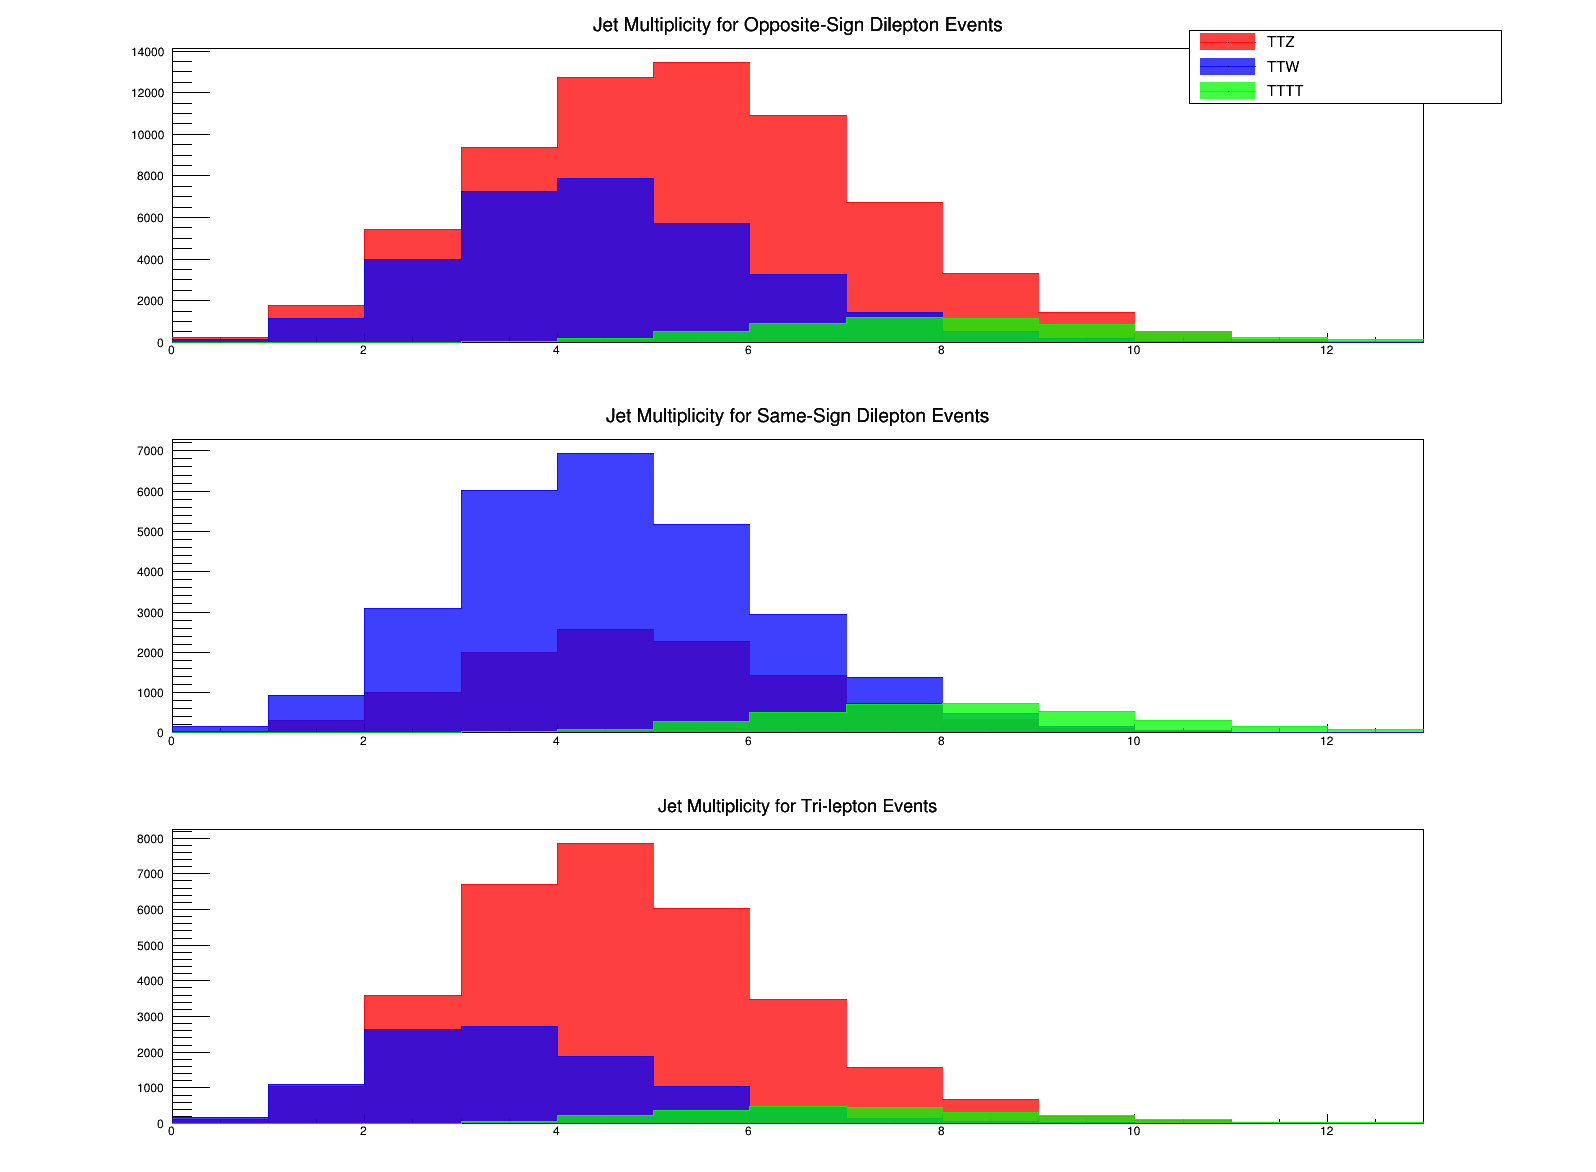

Info in <TCanvas::Print>: png file /tmp/tmpglzaa0pw.png has been created


In [8]:
norm = 0
can.Clear()
can.Divide(1,3)
can.cd(1)
hists, labels = zip(*[(h.jet_count_os_dilepton, h.get_sample_name()) for h in [hists_TTZ, hists_TTW, hists_TTTT]])
stack_os = utils.stack_hist(hists, labels, enable_fill=True, normalize_to=norm, id_="stack_os", title="Jet Multiplicity for Opposite-Sign Dilepton Events")
stack_os.Draw("nostack")
can.cd(2)
hists, labels = zip(*[(h.jet_count_ss_dilepton, h.get_sample_name()) for h in [hists_TTZ, hists_TTW, hists_TTTT]])
stack_ss = utils.stack_hist(hists, labels, enable_fill=True, normalize_to=norm, id_="stack_ss", title="Jet Multiplicity for Same-Sign Dilepton Events")
stack_ss.Draw("nostack")
can.cd(3)
hists, labels = zip(*[(h.jet_count_trilepton, h.get_sample_name()) for h in [hists_TTZ, hists_TTW, hists_TTTT]])
stack_tri = utils.stack_hist(hists, labels, enable_fill=True, normalize_to=norm, id_="stack_tri", title="Jet Multiplicity for Tri-lepton Events")
stack_tri.Draw("nostack")


can.cd(1).BuildLegend(0.75, 0.75, 0.95, 0.95, "")
can

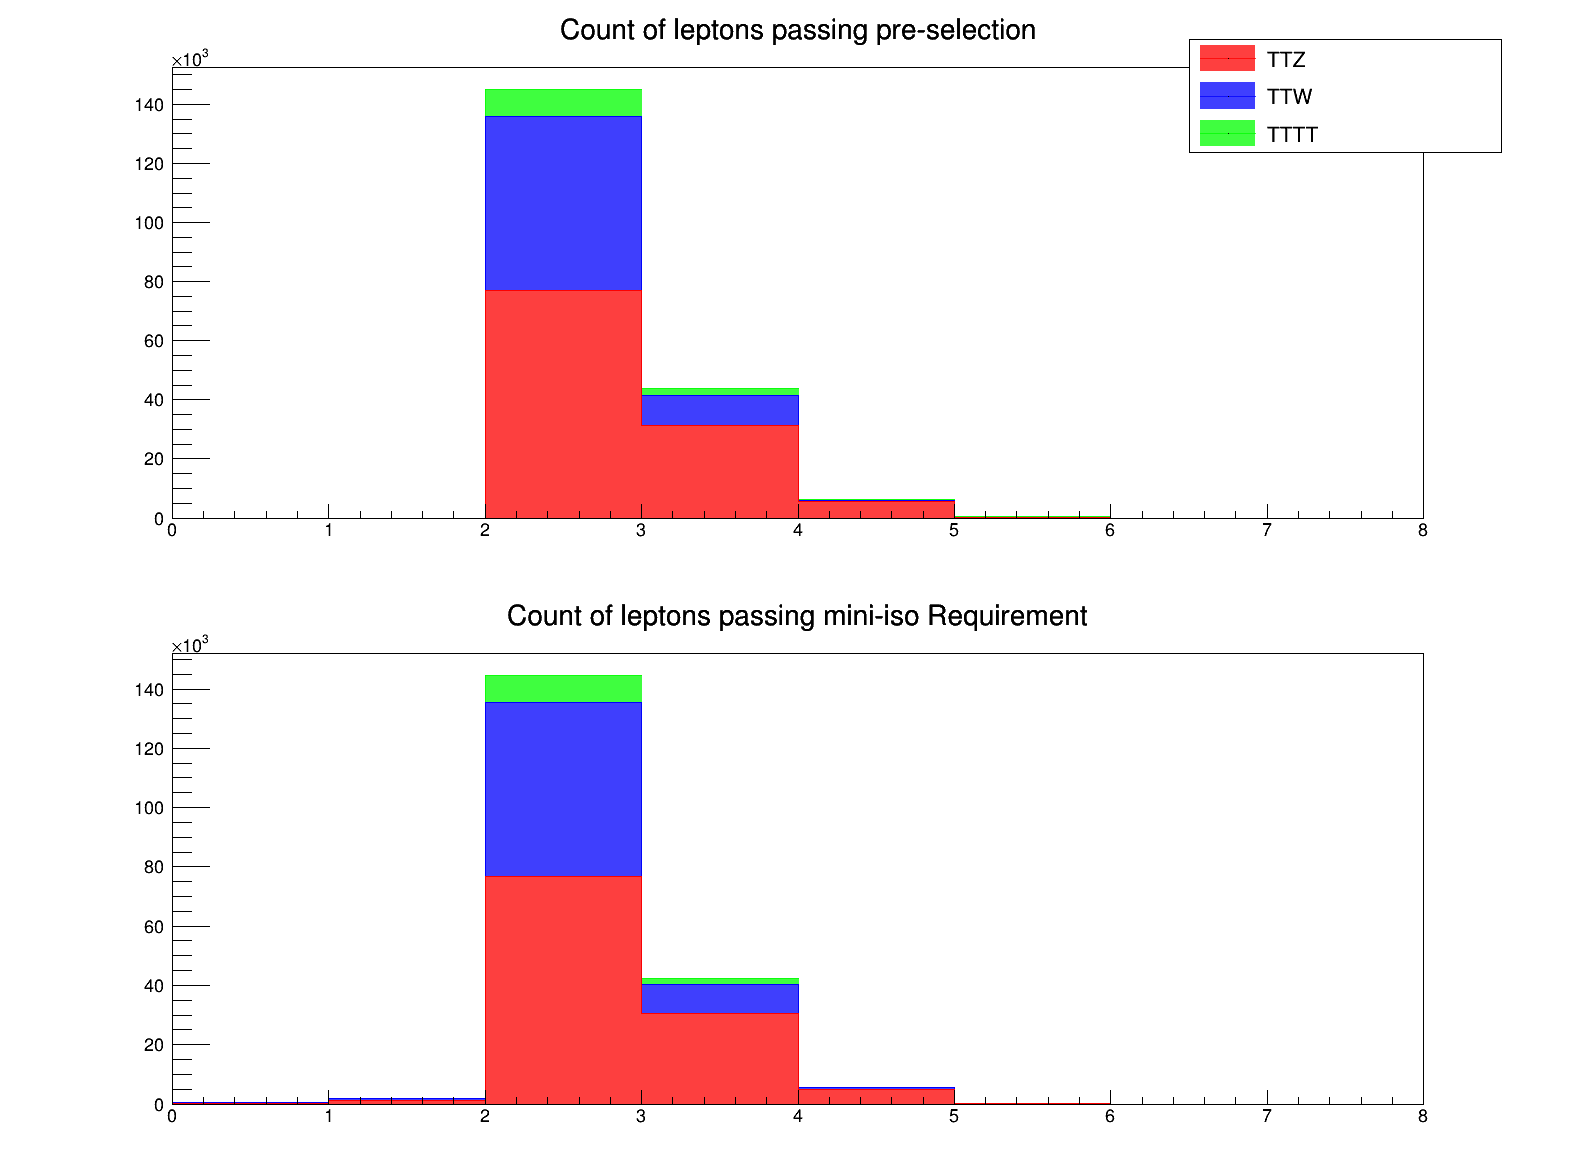

Info in <TCanvas::Print>: png file /tmp/tmpv3dw3r5b.png has been created


In [10]:
can.Clear()
can.Divide(1, 2)
can.cd(1)
hists, labels = zip(*[(h.lepton_count, h.get_sample_name()) for h in [hists_TTZ, hists_TTW, hists_TTTT]])
stack_all = utils.stack_hist(hists, labels, enable_fill=True, normalize_to=0, title="Count of leptons passing pre-selection")
stack_all.Draw()
can.cd(2)
hists, labels = zip(*[(h.lepton_count_pass_miniiso, h.get_sample_name()) for h in [hists_TTZ, hists_TTW, hists_TTTT]])
stack_iso = utils.stack_hist(hists, labels, enable_fill=True, normalize_to=0, title="Count of leptons passing mini-iso Requirement")
stack_iso.Draw()

can.cd(1).BuildLegend(0.75, 0.75, 0.95, 0.95, "")
can